In [2]:
import pandas as pd
import requests
import os


In [3]:
%pwd

'd:\\Runway\\Projects\\SensorQualityClassifier\\research'

In [4]:
os.chdir("../")

In [5]:
%pwd

'd:\\Runway\\Projects\\SensorQualityClassifier'

In [6]:
df= pd.read_csv('artifacts/training_data/Good_Data_Folder/wafer_07012020_041011.csv')
df.head()




,Unnamed: 0,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,Wafer-501,3076.81,2158.75,2208.2334,1517.0152,1.0980,100,110.1900,0.1247,1.4357,...,64.2405,0.5016,0.0152,0.0040,3.0319,0.0465,0.0299,0.0090,64.2405,-1
1,Wafer-502,2951.62,2511.92,2253.5111,1397.5060,0.9660,100,109.7611,0.1210,1.5527,...,0.0000,0.4953,0.0105,0.0037,2.1266,-0.0012,0.0252,0.0081,0.0000,-1
2,Wafer-503,2930.42,2505.17,2235.0556,1302.6607,1.6347,100,109.9856,0.1230,1.4588,...,NaN,0.4958,0.0111,0.0033,2.2296,-0.0012,0.0252,0.0081,0.0000,-1
3,Wafer-504,2997.28,2357.99,2141.0667,1236.5212,0.9698,100,98.3344,0.1238,1.5973,...,NaN,0.4962,0.0086,0.0024,1.7297,-0.0012,0.0252,0.0081,0.0000,-1
4,Wafer-505,3025.10,2475.18,2235.0556,1302.6607,1.6347,100,109.9856,0.1230,1.5525,...,NaN,0.4983,0.0159,0.0041,3.1927,-0.0012,0.0252,0.0081,0.0000,-1


In [7]:
# First, copy the existing column names to a list.
new_columns = df.columns.tolist()
#print(new_columns)

# Then, replace the name of the first column (which might be an empty string or whatever placeholder pandas used).
new_columns[0] = 'wafer_num'

# Now, assign this list back to the DataFrame's columns attribute.
df.columns = new_columns

#covest uppercase to lowercase
df.columns = [col.lower() for col in df.columns]

# Convert all column names: replace '-' with '_' and convert to lowercase
df.columns = [col.replace('-', '_').lower() for col in df.columns]

# Convert all column names: replace '/' with '_' and convert to lowercase
df.columns = [col.replace('/', '_').lower() for col in df.columns]


# Now, if you view the first few rows of your DataFrame, the first column will have the name 'new_column_name'.
#print(df.head())
df.dtypes

wafer_num      object
sensor_1      float64
sensor_2      float64
sensor_3      float64
sensor_4      float64
               ...   
sensor_587    float64
sensor_588    float64
sensor_589    float64
sensor_590    float64
good_bad        int64
Length: 592, dtype: object

In [29]:
import hopsworks

In [30]:
FS_API_KEY = ""
FS_PROJECT_NAME = "krunalss"
#project = hopsworks.login()
project = hopsworks.login(
        api_key_value=FS_API_KEY, project=FS_PROJECT_NAME
    )
fs = project.get_feature_store()
print(fs)


Connection closed.
Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/104599
Connected. Call `.close()` to terminate connection gracefully.


In [31]:
wafer_fg = fs.get_or_create_feature_group(
    name="wafer_project",
    version=1,
    description="good_training_data",
    primary_key=["wafer_num"],

)

In [32]:
# Insert data into feature group
wafer_fg.insert(df)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/104599/fs/104518/fg/541048


Uploading Dataframe: 0.00% |          | Rows 0/100 | Elapsed Time: 00:00 | Remaining Time: ?

Launching job: wafer_project_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/104599/jobs/named/wafer_project_1_offline_fg_materialization/executions


(<hsfs.core.job.Job at 0x1974d504340>, None)

In [1]:
10+10

20

In [29]:
import hsfs
from sklearn.model_selection import train_test_split

In [30]:
import hopsworks
FS_API_KEY = ""
FS_PROJECT_NAME = "krunalss"
#project = hopsworks.login()
project = hopsworks.login(
        api_key_value=FS_API_KEY, project=FS_PROJECT_NAME
    )
fs = project.get_feature_store()
print(fs)


Connection closed.
Connected. Call `.close()` to terminate connection gracefully.



Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/104599
Connected. Call `.close()` to terminate connection gracefully.


In [31]:
connection = hsfs.connection()
fs = connection.get_feature_store(name='krunalss_featurestore')

Connected. Call `.close()` to terminate connection gracefully.


In [32]:
# Fetch the feature group
feature_group = fs.get_feature_group('wafer_project', version=1)


In [33]:
# Construct a query to select all features from the feature group
# Note: By not specifying specific features in select(), we get all features
query = feature_group.select_all()

In [34]:
# Read the query into a Pandas DataFrame
feature_dataframe = query.read()



Finished: Reading data from Hopsworks, using Hive (11.53s) 


In [35]:
print(feature_dataframe.shape)

(1537, 592)


In [42]:
target_feature='good_bad'
drop_non_contributing_feature='wafer_num'
# Assuming you have one target variable you know the name of, e.g., 'target_feature'
# Split the dataframe into features (X) and target (y)
X = feature_dataframe.drop(target_feature, axis=1)  # Drop the target variable to isolate features
X = feature_dataframe.drop(drop_non_contributing_feature, axis=1)
y = feature_dataframe[target_feature]  # Isolate the target variable
#print(y)

In [ ]:
print(X)

In [71]:
# Proceed with your train-test split or any other data preparation steps
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

In [72]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [73]:
# Create an XGBoost classifier
clf = xgb.XGBClassifier()

# Fit XGBoost classifier to the training data
clf.fit(X_train, y_train)

XGBClassifier()

In [74]:
# Predict the training data using the trained classifier
y_pred_train = clf.predict(X_train)

# Predict the test data using the trained classifier
y_pred_test = clf.predict(X_test)

In [75]:
# Compute f1 score
metrics = {
    "f1_score": f1_score(y_test, y_pred_test, average='macro')
}
metrics

{'f1_score': 1.0}

In [76]:
# Calculate and print the confusion matrix for the test predictions
results = confusion_matrix(y_test, y_pred_test)
print(results)

[[435   0]
 [  0  27]]


In [77]:
import seaborn as sns
import pandas as pd

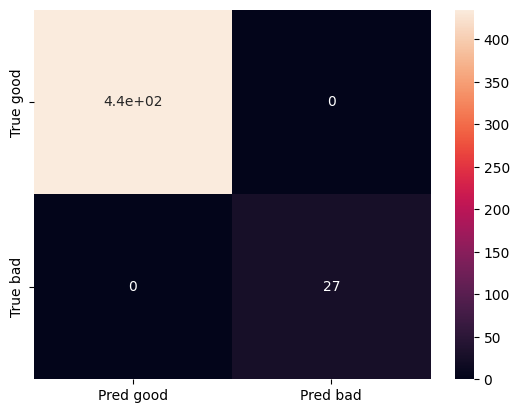

In [78]:
# Create a DataFrame for the confusion matrix results
df_cm = pd.DataFrame(
    results, 
    ['True good', 'True bad'],
    ['Pred good', 'Pred bad'],
)

# Create a heatmap using seaborn with annotations
cm = sns.heatmap(df_cm, annot=True)

# Get the figure and display it
fig = cm.get_figure()
fig.show()

In [80]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 100.00%


Model Schema
The model needs to be set up with a Model Schema, which describes the inputs and outputs for a model.
A Model Schema can be automatically generated from training examples, as shown below.

In [81]:
from hsml.schema import Schema
from hsml.model_schema import ModelSchema

# Create a Schema for the input features using the values of X_train
input_schema = Schema(X_train.values)

# Create a Schema for the output using y_train
output_schema = Schema(y_train)

# Create a ModelSchema using the defined input and output schemas
model_schema = ModelSchema(input_schema=input_schema, output_schema=output_schema)

# Convert the model schema to a dictionary for inspection
model_schema.to_dict()

{'input_schema': {'tensor_schema': {'shape': '(1075, 591)',
   'type': 'float64'}},
 'output_schema': {'columnar_schema': [{'name': 'good_bad', 'type': 'int64'}]}}

Register model
One of the features in Hopsworks is the model registry. This is where we can store different versions of models and compare their performance. Models from the registry can then be served as API endpoints.

In [84]:
import joblib
import os

In [86]:
# Specify the directory name for saving the model and related artifacts
model_dir = "sensor_quality_model"

# Check if the directory already exists; if not, create it
if not os.path.isdir(model_dir):
    os.mkdir(model_dir)

# Save the trained XGBoost classifier to a joblib file in the specified directory
joblib.dump(clf, model_dir + '/xgboost_model.pkl')

# Save the confusion matrix heatmap figure to an image file in the specified directory
fig.savefig(model_dir + "/confusion_matrix.png")

In [87]:
# Get the model registry
mr = project.get_model_registry()

# Create a Python model named "sensor" in the model registry
sensor_model = mr.python.create_model(
    name="sensor", 
    metrics=metrics,             # Specify the metrics used to evaluate the model
    model_schema=model_schema,   # Use the previously defined model schema
    # input_example=[4700702588013561],  # Provide an input example for testing deployments
    description="detection of sensor's wafer condition whether it is good or bad",  # Add a description for the model
)

# Save the model to the specified directory
sensor_model.save(model_dir)

Connected. Call `.close()` to terminate connection gracefully.


  0%|          | 0/6 [00:00<?, ?it/s]

Uploading: 0.000%|          | 0/16945 elapsed<00:00 remaining<?

Uploading: 0.000%|          | 0/38079 elapsed<00:00 remaining<?

Uploading: 0.000%|          | 0/250 elapsed<00:00 remaining<?

Model created, explore it at https://c.app.hopsworks.ai:443/p/104599/models/sensor/1


Model(name: 'sensor', version: 1)